<a href="https://colab.research.google.com/github/aryijq/ecommerce-behavior-data-analysis/blob/main/cp2_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
# pip install datatable

     |████████████████████████████████| 96.9 MB 87 kB/s 


In [19]:
import pandas as pd
# import datatable as dt

event_time - 이벤트가 발생한 시간(UTC기준)\
event_type - 고객이 진행한 이벤트\
product_id - 제품의 ID\
category_id - 제품의 카테고리 ID\
categoty_code - 제품의 카테고리 분류(코드명)\
brand - 브랜드\
price - 제품의 유통가격\
user_id - 영구 사용자 ID\
user_session - 임시 사용자의 세션ID

In [4]:
csv = '/content/drive/MyDrive/Data/2019-Oct.csv'

# # 아래 방법은 코랩 ram초과로 에러발생
# datatable_df = dt.fread(csv, encoding='utf-8')
# df = datatable_df.to_pandas()

df = pd.read_csv(csv)

In [5]:
df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00 UTC,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 00:00:01 UTC,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 00:00:01 UTC,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d
...,...,...,...,...,...,...,...,...,...
42448759,2019-10-31 23:59:58 UTC,view,2300275,2053013560530830019,electronics.camera.video,gopro,527.40,537931532,22c57267-da98-4f28-9a9c-18bb5b385193
42448760,2019-10-31 23:59:58 UTC,view,10800172,2053013554994348409,NaN,redmond,61.75,527322328,5054190a-46cb-4211-a8f1-16fc1a060ed8
42448761,2019-10-31 23:59:58 UTC,view,5701038,2053013553970938175,auto.accessories.player,kenwood,128.70,566280422,05b6c62b-992f-4e8e-91f7-961bcb4719cd
42448762,2019-10-31 23:59:59 UTC,view,21407424,2053013561579406073,electronics.clocks,tissot,689.85,513118352,4c14bf2a-2820-4504-929d-046356a5a204


In [6]:
df.columns

Index(['event_time', 'event_type', 'product_id', 'category_id',
       'category_code', 'brand', 'price', 'user_id', 'user_session'],
      dtype='object')

In [7]:
# 결측치 조회
df.isnull().sum()

event_time              0
event_type              0
product_id              0
category_id             0
category_code    13515609
brand             6117080
price                   0
user_id                 0
user_session            2
dtype: int64

In [9]:
df['event_type'].unique()

array(['view', 'purchase', 'cart'], dtype=object)

In [22]:
df.loc[df['event_type'] == 'purchase']

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
162,2019-10-01 00:02:14 UTC,purchase,1004856,2053013555631882655,electronics.smartphone,samsung,130.76,543272936,8187d148-3c41-46d4-b0c0-9c08cd9dc564
308,2019-10-01 00:04:37 UTC,purchase,1002532,2053013555631882655,electronics.smartphone,apple,642.69,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68
379,2019-10-01 00:06:02 UTC,purchase,5100816,2053013553375346967,NaN,xiaomi,29.51,514591159,0e5dfc4b-2a55-43e6-8c05-97e1f07fbb56
442,2019-10-01 00:07:07 UTC,purchase,13800054,2053013557418656265,furniture.bathroom.toilet,santeri,54.42,555332717,1dea3ee2-2ded-42e8-8e7a-4e2ad6ae942f
574,2019-10-01 00:09:26 UTC,purchase,4804055,2053013554658804075,electronics.audio.headphone,apple,189.91,524601178,2af9b570-0942-4dcd-8f25-4d84fba82553
...,...,...,...,...,...,...,...,...,...
42448148,2019-10-31 23:55:13 UTC,purchase,26402784,2053013563651392361,NaN,NaN,102.45,516604399,a98bd433-57ac-42d0-ba81-e18b135a7a16
42448173,2019-10-31 23:55:21 UTC,purchase,47500017,2110937143172923797,construction.tools.light,puckator,20.59,514622109,5724116e-365b-4ac1-9d03-b8d66e1ccc7c
42448271,2019-10-31 23:56:03 UTC,purchase,1003306,2053013555631882655,electronics.smartphone,apple,577.89,512717356,f35ac37c-9573-4e30-b3d9-c09bb0b95a2b
42448362,2019-10-31 23:56:53 UTC,purchase,1004240,2053013555631882655,electronics.smartphone,apple,1054.60,533892594,3a5a3b01-2ab1-4a1d-a202-30d336e0057b


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib as mpl

# Windows
mpl.rc("font", family='Malgun Gothic')

warnings.filterwarnings("ignore")
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [21]:
# event_type 비율 조회
df['event_type'].value_counts(normalize=True)

view        0.960673
cart        0.021827
purchase    0.017500
Name: event_type, dtype: float64

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


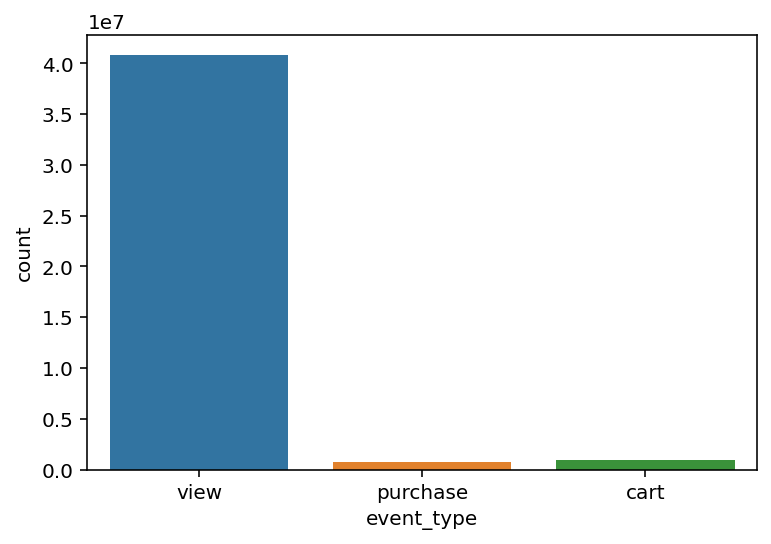

In [12]:
# event_type 비율 시각화
sns.countplot(x=df['event_type']);

In [13]:
# 브랜드 카운트
df['brand'].value_counts()

samsung         5282775
apple           4122554
xiaomi          3083763
huawei          1111205
lucente          655861
                 ...   
nec                   1
neocoregames          1
incase                1
portdesigns           1
skindoctors           1
Name: brand, Length: 3444, dtype: int64

In [18]:
# 상품가격 평균분석
df['price'].describe()

count    4.244876e+07
mean     2.903237e+02
std      3.582692e+02
min      0.000000e+00
25%      6.598000e+01
50%      1.629300e+02
75%      3.585700e+02
max      2.574070e+03
Name: price, dtype: float64

In [20]:
# 유저 접속 세션 횟수 조회
df['user_id'].value_counts()

512475445    7436
512365995    4013
526731152    2912
512505687    2894
513021392    2862
             ... 
556920045       1
521755468       1
515083572       1
549391147       1
544578298       1
Name: user_id, Length: 3022290, dtype: int64